### Load Data

In [375]:
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import iqr
from scipy.stats import kurtosis
from scipy.stats import skew
from statistics import mean

import seaborn as sns
sns.set_theme(style='whitegrid')
sns.set(font_scale = 1.25)
print("Setup Complete")


Setup Complete


# Context

### Load the data

In [303]:
passenger_data = pd.read_csv('./train.csv', index_col='PassengerId')
passenger_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


### Fields definition
- `Survived` - Survival (0 = No; 1 = Yes)
- `Pclass` - Passenger airline class (1 = first, 2 = bussiness, 3 = economy).
- `Name` - Passenger full name (Firts, Second).
- `Sex` - Sex (male, female).
- `Age` - Age (in years).
- `SibSp` - Number of Siblings/Spouses Aboard
- `Parch` - Number of Parents/Children Aboard
- `Ticket` - Ticket number.
- `Fare` - Ticket fare.
- `Cabin` - Cabin (optional).
- `Embarked` - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

# Data quality assessment

### General Data Description

In [341]:
print(f'Passenger_data shape is {passenger_data.shape}')

Passenger_data shape is (100000, 14)


In [305]:
# Get data values info.
passenger_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Survived  100000 non-null  int64  
 1   Pclass    100000 non-null  int64  
 2   Name      100000 non-null  object 
 3   Sex       100000 non-null  object 
 4   Age       96708 non-null   float64
 5   SibSp     100000 non-null  int64  
 6   Parch     100000 non-null  int64  
 7   Ticket    95377 non-null   object 
 8   Fare      99866 non-null   float64
 9   Cabin     32134 non-null   object 
 10  Embarked  99750 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 9.2+ MB


In [306]:
# Check for duplicate.
duplicate_rows = passenger_data.loc[passenger_data.duplicated().values]
duplicate_rows_count = duplicate_rows.shape[0]
print(f'Duplicate rows count: {duplicate_rows_count}')

Duplicate rows count: 0


In [335]:

survived_not_null_percent = passenger_data.loc[pd.notna(passenger_data.Survived)].Survived.shape[0] / passenger_data.Survived.shape[0] * 100
pclass_not_null_percent = passenger_data.loc[pd.notna(passenger_data.Pclass)].Pclass.shape[0] / passenger_data.Pclass.shape[0] * 100
name_not_null_percent = passenger_data.loc[pd.notna(passenger_data.Name)].Name.shape[0] / passenger_data.Name.shape[0] * 100
sex_not_null_percent = passenger_data.loc[pd.notna(passenger_data.Sex)].Sex.shape[0] / passenger_data.Sex.shape[0] * 100
age_not_null_percent = passenger_data.loc[pd.notna(passenger_data.Age)].Age.shape[0] / passenger_data.Age.shape[0] * 100
sibSp_not_null_percent = passenger_data.loc[pd.notna(passenger_data.SibSp)].SibSp.shape[0] / passenger_data.SibSp.shape[0] * 100
parch_not_null_percent = passenger_data.loc[pd.notna(passenger_data.Parch)].Parch.shape[0] / passenger_data.Parch.shape[0] * 100
ticket_not_null_percent = passenger_data.loc[pd.notna(passenger_data.Ticket)].Ticket.shape[0] / passenger_data.Ticket.shape[0] * 100
fare_not_null_percent = passenger_data.loc[pd.notna(passenger_data.Fare)].Fare.shape[0] / passenger_data.Fare.shape[0] * 100
cabin_not_null_percent = passenger_data.loc[pd.notna(passenger_data.Cabin)].Cabin.shape[0] / passenger_data.Cabin.shape[0] * 100
embarked_not_null_percent = passenger_data.loc[pd.notna(passenger_data.Embarked)].Embarked.shape[0] / passenger_data.Embarked.shape[0] * 100

print("#\tColumn   \tNot-Null, %")
print("---\t---   \t\t---")
print(f"0\tSurvived\t{survived_not_null_percent}")
print(f"1\tPclass   \t{pclass_not_null_percent}")
print(f"2\tName     \t{name_not_null_percent}")
print(f"3\tSex     \t{sex_not_null_percent}")
print(f"4\tAge     \t{age_not_null_percent}")
print(f"5\tSibSp   \t{sibSp_not_null_percent}")
print(f"6\tParch    \t{parch_not_null_percent}")
print(f"7\tTicket   \t{ticket_not_null_percent}")
print(f"8\tFare     \t{fare_not_null_percent}")
print(f"9\tCabin    \t{cabin_not_null_percent}")
print(f"10\tEmbarked \t{embarked_not_null_percent}")


#	Column   	Not-Null, %
---	---   		---
0	Survived	100.0
1	Pclass   	100.0
2	Name     	100.0
3	Sex     	100.0
4	Age     	96.708
5	SibSp   	100.0
6	Parch    	100.0
7	Ticket   	95.377
8	Fare     	99.866
9	Cabin    	32.134
10	Embarked 	99.75


**Summary**:
- `Age`, `Ticket`, `Fare`, `Cabin`, `Embarked` have `Null` values.
- ~62% of `Cabin` values are `NaN`.
- Unable to set default values for specified columns.

# Data exploration

## 1. Exploration of each individual variable

In [416]:
passenger_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,96708.000000,100000.000000,100000.000000,99866.00000
mean,0.427740,2.106910,38.355472,0.397690,0.454560,43.92933
std,0.494753,0.837727,18.313556,0.862566,0.950076,69.58882
min,0.000000,1.000000,0.080000,0.000000,0.000000,0.68000
25%,0.000000,1.000000,25.000000,0.000000,0.000000,10.04000
50%,0.000000,2.000000,39.000000,0.000000,0.000000,24.46000
75%,1.000000,3.000000,53.000000,1.000000,1.000000,33.50000
max,1.000000,3.000000,87.000000,8.000000,9.000000,744.66000


In [399]:
# Calculate additional statistics.
def calculate_additional_stats(series):
    series = series[series.notna()]
    q75, q25 = np.percentile(series, [75 ,25])
    iq_range = q75 - q25
    iq_mean = round(mean(sorted(val for val in series.values if val >= q25 and val<=q75)),2)
    _range = series.max() - series.min()
    _kurtosis = round(kurtosis(series.values),2)
    _skew = round(skew(series.values),2)
    return (iq_range, iq_mean, _range, _kurtosis, _skew)


columns = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
print("#\tColumn   \tInterquartile range \tInterquartile mean \t Range \t\t Kurtosis \t Skew")
print("---\t---   \t\t--- \t\t\t--- \t\t\t --- \t\t --- \t\t ---")
cnt = 1
for col in columns:
    stats = calculate_additional_stats(passenger_data[col])
    print(f'{cnt}\t{col}      \t{stats[0]}\t\t\t{stats[1]} \t\t\t {stats[2]}\t\t {stats[3]}\t\t {stats[4]}')
    cnt = cnt+1



#	Column   	Interquartile range 	Interquartile mean 	 Range 		 Kurtosis 	 Skew
---	---   		--- 			--- 			 --- 		 --- 		 ---
1	Survived      	1.0			0 			 1		 -1.91		 0.29
2	Pclass      	2.0			2 			 2		 -1.55		 -0.2
3	Age      	28.0			38.64 			 86.92		 -0.8		 -0.15
4	SibSp      	1.0			0 			 8		 21.36		 3.76
5	Parch      	1.0			0 			 9		 20.59		 3.54
6	Fare      	23.46			21.82 			 743.98		 19.6		 3.92


### 1.1. Survived and Pclass

Text(0.5, 1.0, 'Pclass (100.0% not-null)')

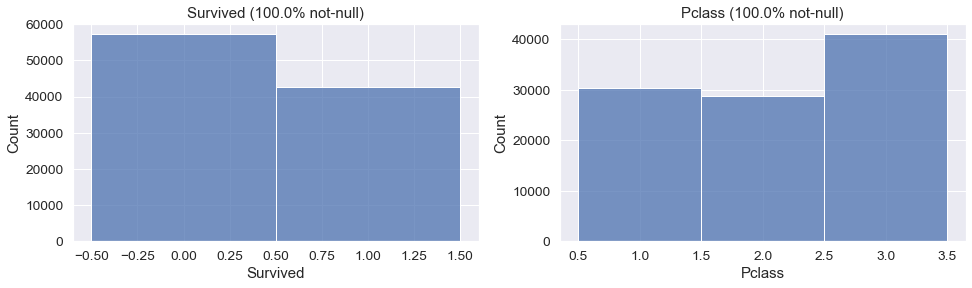

In [342]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(16,4))

sns.histplot(passenger_data, x="Survived", discrete=True, ax = axes[0] )
axes[0].set_title(f"Survived ({survived_not_null_percent}% not-null)")

sns.histplot(passenger_data, x="Pclass", discrete=True, ax = axes[1])
axes[1].set_title(f"Pclass ({pclass_not_null_percent}% not-null)")

### 1.2. Sex and Age

Text(0.5, 1.0, 'Age (96.708% not-null)')

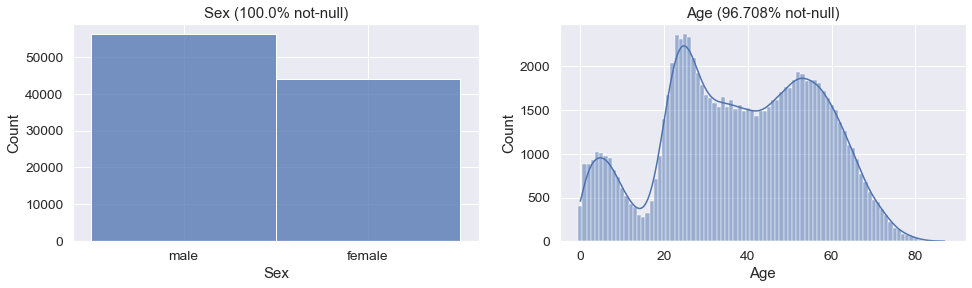

In [309]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(16,4))

sns.histplot(passenger_data, x="Sex", discrete=True, ax = axes[0])
axes[0].set_title(f"Sex ({sex_not_null_percent}% not-null)")

# sns.histplot(passenger_data, x="Age", discrete=True, ax = axes[1] )
sns.histplot(passenger_data, x="Age", discrete=True, ax = axes[1], kde=True )
axes[1].set_title(f"Age ({age_not_null_percent}% not-null)")


**Summary**: The most active use of aircraft are people from 25 to 30 years old.

### 1.3. SibSp and Parch

Text(0.5, 1.0, 'Parch (100.0% not-null)')

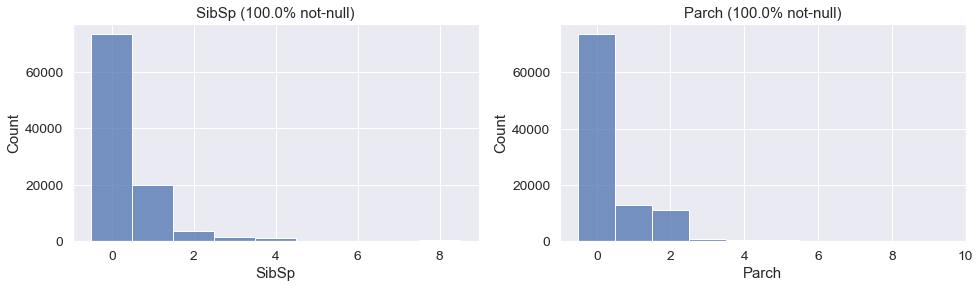

In [404]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(16,4))

sns.histplot(passenger_data, x="SibSp", discrete=True, ax = axes[0])
axes[0].set_title(f"SibSp ({sibSp_not_null_percent}% not-null)")

sns.histplot(passenger_data, x="Parch", discrete=True, ax = axes[1])
axes[1].set_title(f"Parch ({parch_not_null_percent}% not-null)")

**Summary**: most peaple fly without any Parents/Children/Siblings/Spouses.

### 1.4. Fare and Embarked

Percent of `S` Embarked : 72.32%


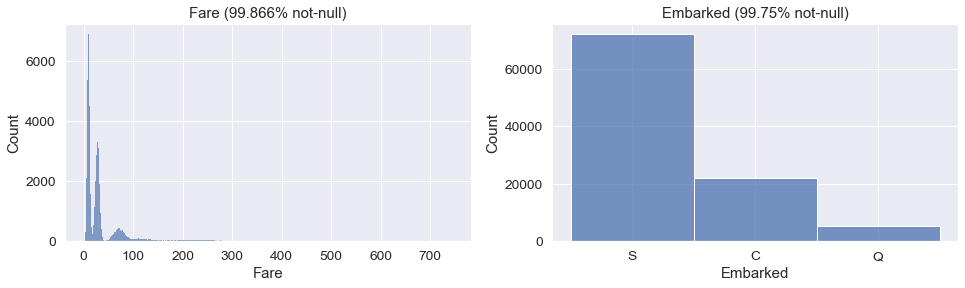

In [421]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(16,4))

sns.histplot(passenger_data, x="Fare", discrete=True, ax = axes[0])
axes[0].set_title(f"Fare ({fare_not_null_percent}% not-null)")

sns.histplot(passenger_data, x="Embarked", discrete=True, ax = axes[1])
axes[1].set_title(f"Embarked ({embarked_not_null_percent}% not-null)")

# Percent of "S" Embarked point.
embarked_total_count = passenger_data[pd.notna(passenger_data.Embarked)].Embarked.count()
embarked_s_count = passenger_data[passenger_data.Embarked == "S"].Embarked.count()
embarked_persent = round(embarked_s_count/embarked_total_count*100 ,2)
print(f'Percent of `S` Embarked : {embarked_persent}%')

**Summary**: 
- The Fare has a three-modal distribution (corresponds to 3 ticket classes - Pclass).
- The most popular Embarked point is S (Southampton) ~72.32%.

### 1.5. Name

In [312]:
passenger_data['LastName'] = passenger_data.Name.map(lambda p: p.split(',')[0])
passenger_data['FirstName'] = passenger_data.Name.map(lambda p: p.split(',')[1])
passenger_data.Name.describe()

count            100000
unique            92144
top       Johnson, John
freq                 31
Name: Name, dtype: object

Text(0, 0.5, 'Name')

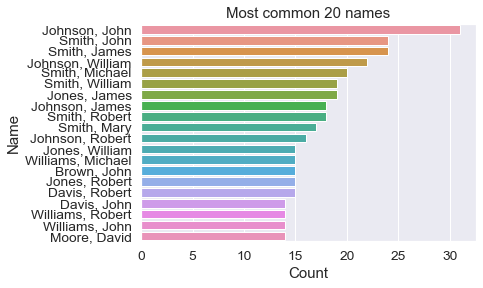

In [313]:
top_names = passenger_data.groupby('Name').Name.count().sort_values(ascending = False)

sns.barplot(y=top_names.iloc[0:20].index, x = top_names.iloc[0:20].values)
plt.title('Most common 20 names') 
plt.xlabel('Count')
plt.ylabel('Name')

#### 1.5.1. First Name statistics

In [314]:
passenger_data.FirstName.describe()

count     100000
unique      3953
top        James
freq        2112
Name: FirstName, dtype: object

Text(0, 0.5, 'First Name')

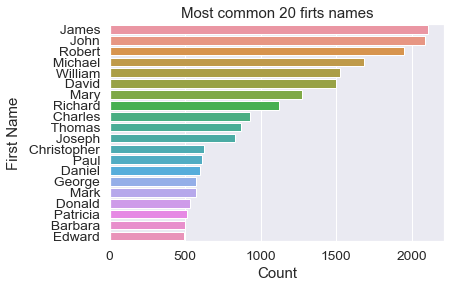

In [315]:
top_first_names = passenger_data.groupby('FirstName').Name.count().sort_values(ascending = False)

sns.barplot(y=top_first_names.iloc[0:20].index, x = top_first_names.iloc[0:20].values)
plt.title('Most common 20 firts names') 
plt.xlabel('Count')
plt.ylabel('First Name')

#### 1.5.2. Last Name statistics

In [316]:
passenger_data.LastName.describe()

count     100000
unique     21558
top        Smith
freq        1162
Name: LastName, dtype: object

Text(0, 0.5, 'Last Name')

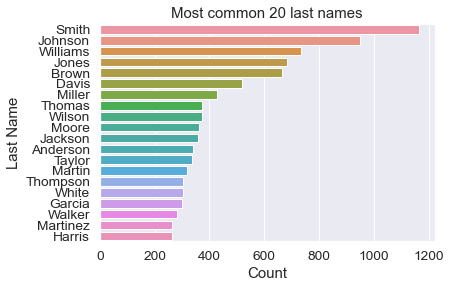

In [317]:
top_last_names = passenger_data.groupby('LastName').Name.count().sort_values(ascending = False)

sns.barplot(y=top_last_names.iloc[0:20].index, x = top_last_names.iloc[0:20].values)
plt.title('Most common 20 last names') 
plt.xlabel('Count')
plt.ylabel('Last Name')

### 1.6. Ticket

In [318]:
passenger_data.Ticket.describe()

count     95377
unique    75331
top        A/5 
freq        602
Name: Ticket, dtype: object

Text(0, 0.5, 'Ticket')

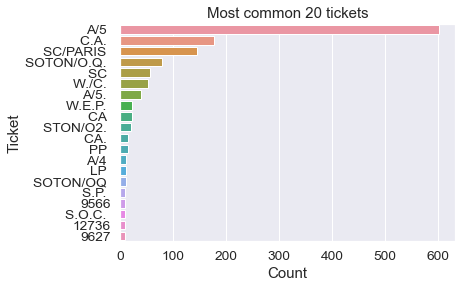

In [401]:
top_ticket_names = passenger_data.groupby('Ticket').Ticket.count().sort_values(ascending = False)

sns.barplot(y=top_ticket_names.iloc[0:20].index, x = top_ticket_names.iloc[0:20].values)
plt.title('Most common 20 tickets') 
plt.xlabel('Count')
plt.ylabel('Ticket')

### 1.7. Cabin

In [319]:
passenger_data.Cabin.describe()

count      32134
unique     26992
top       C19828
freq           6
Name: Cabin, dtype: object

Text(0, 0.5, 'Cabins')

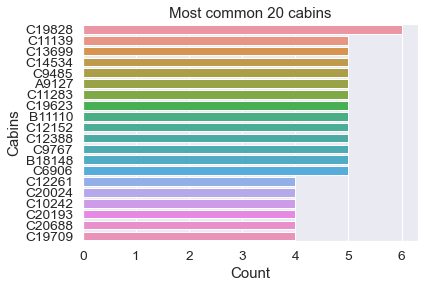

In [402]:
top_cabin_names = passenger_data.groupby('Cabin').Cabin.count().sort_values(ascending = False)

sns.barplot(y=top_cabin_names.iloc[0:20].index, x = top_cabin_names.iloc[0:20].values)
plt.title('Most common 20 cabins') 
plt.xlabel('Count')
plt.ylabel('Cabins')

## 2. Exploring the relationship between each variable and the target

### 2.1. Fare vs Age/Pclass

Text(0.5, 1.0, 'Fare / Age relationship')

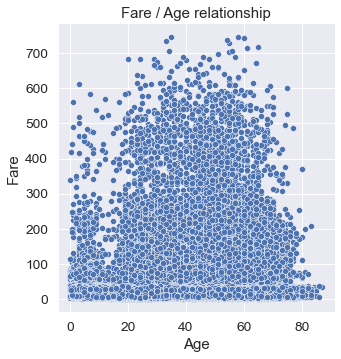

In [424]:
sns.relplot(data=passenger_data, x="Age", y="Fare")
plt.title('Fare / Age relationship')

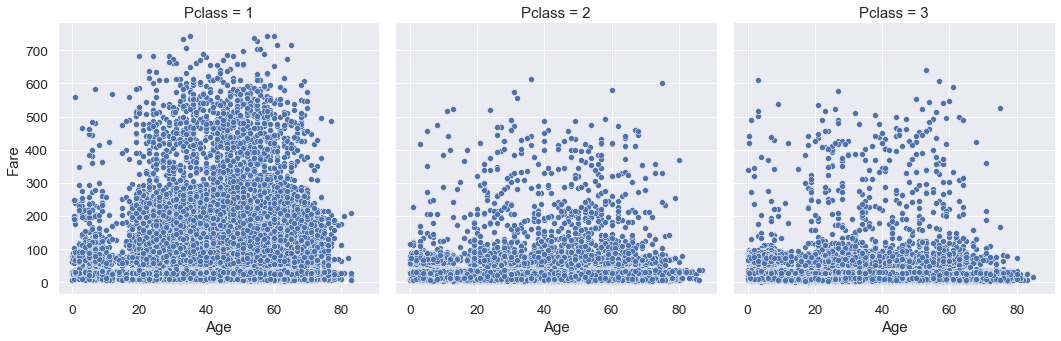

In [422]:
sns.relplot(data=passenger_data, x="Age", y="Fare", col='Pclass')

**Summary**: There is no linear relationship between Fare and Age. But it can be noted, that tickets for children in first class were bought cheaper than for adults.

## 3. Assessing interactions between variables

### 3.1. Pclass (Passenger Class) vs Survived

Text(0.5, 0, 'Passenger class')

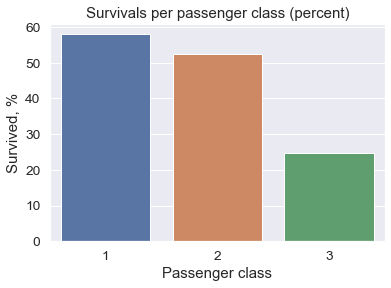

In [320]:
pclass_total_stats = passenger_data.groupby(['Pclass']).Name.count()

pclass_stats = pd.DataFrame(data = pclass_total_stats)
pclass_stats = pclass_stats.rename(columns = {'Name':'Total'})
pclass_stats['Survived'] = passenger_data.loc[passenger_data.Survived == True].groupby(['Pclass']).Name.count()
pclass_stats['Survived_Percent'] = pclass_stats.Survived / pclass_stats.Total * 100
pclass_stats['Pclass'] = pclass_stats.index


sns.barplot(x=pclass_stats.Pclass, y=pclass_stats.Survived_Percent)
plt.title('Survivals per passenger class (percent)')
plt.ylabel('Survived, %')
plt.xlabel('Passenger class')

**Summary**: To survive, it is better to fly first class.

### 3.2. Pclass (Passenger Class) vs Fare

(0.0, 60.0)

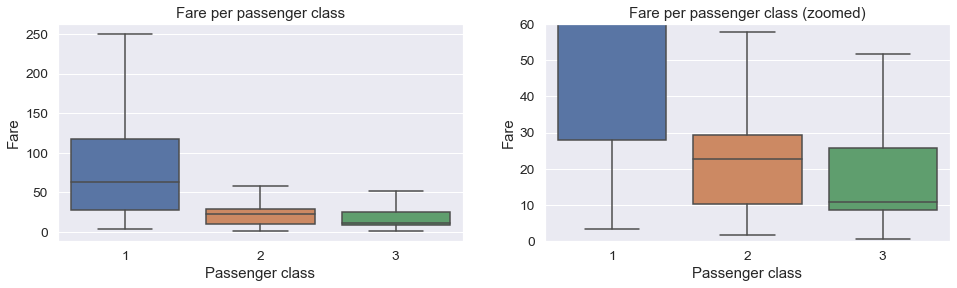

In [321]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(16,4))

sns.boxplot(data=passenger_data, x="Pclass", y="Fare", showfliers = False, ax = axes[0])
axes[0].set_title('Fare per passenger class')
axes[0].set_ylabel('Fare')
axes[0].set_xlabel('Passenger class')

sns.boxplot(data=passenger_data, x="Pclass", y="Fare", showfliers = False, ax = axes[1])
axes[1].set_title('Fare per passenger class (zoomed)')
axes[1].set_ylabel('Fare')
axes[1].set_xlabel('Passenger class')
axes[1].set_ylim(0,60)

**Summary**: The higher passenger class (Pclass), the higher fare.

(0.0, 60.0)

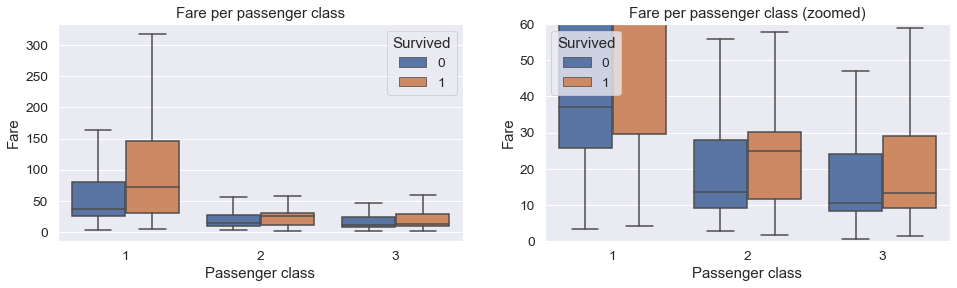

In [322]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(16,4))

sns.boxplot(data=passenger_data, x="Pclass", y="Fare", hue="Survived", showfliers = False, ax = axes[0])
axes[0].set_title('Fare per passenger class')
axes[0].set_ylabel('Fare')
axes[0].set_xlabel('Passenger class')

sns.boxplot(data=passenger_data, x="Pclass", y="Fare", hue="Survived", showfliers = False, ax = axes[1])
axes[1].set_title('Fare per passenger class (zoomed)')
axes[1].set_ylabel('Fare')
axes[1].set_xlabel('Passenger class')
axes[1].set_ylim(0, 60)

**Summary**: To survive, it is better to overpay for the flight.

### 3.3. Fare vs Age

Text(0.5, 0, 'Passenger class')

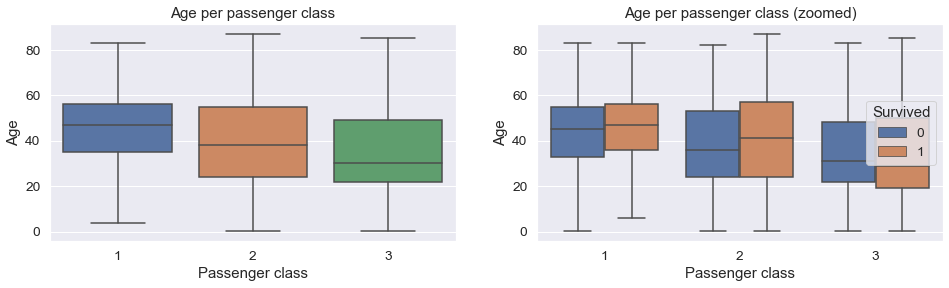

In [324]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(16,4))

sns.boxplot(data=passenger_data, x="Pclass", y="Age", showfliers = False, ax = axes[0])
axes[0].set_title('Age per passenger class')
axes[0].set_ylabel('Age')
axes[0].set_xlabel('Passenger class')

sns.boxplot(data=passenger_data, x="Pclass", y="Age", hue='Survived', showfliers = False, ax = axes[1])
axes[1].set_title('Age per passenger class (zoomed)')
axes[1].set_ylabel('Age')
axes[1].set_xlabel('Passenger class')

**Summary**: the older the passenger, the higher the flight class.

In [325]:
def set_child_adult(row):
    
    if (row.Age >= 18):
        row.ChildAdult = 'Adult'
    elif (row.Age < 18 and row.Age>=0):
        row.ChildAdult = 'Child'
    else:
        row.ChildAdult = np.NaN
    return row

passenger_data['ChildAdult'] = passenger_data['Sex']
passenger_data = passenger_data.apply(set_child_adult, axis='columns')

Text(0.5, 0, 'Age')

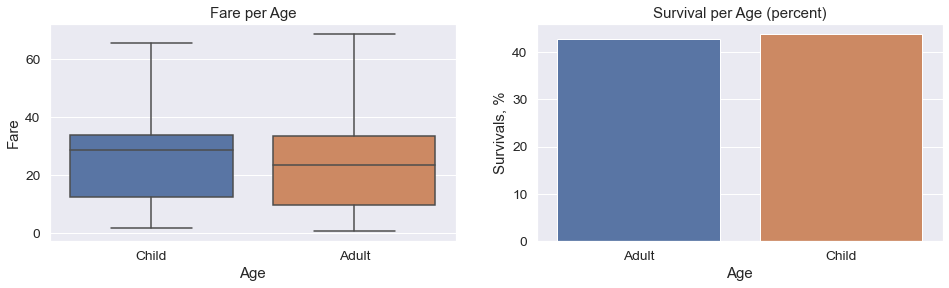

In [405]:
child_adult_total_stats = passenger_data.groupby(['ChildAdult']).Name.count()

child_adult_stats = pd.DataFrame(data = child_adult_total_stats)
child_adult_stats = child_adult_stats.rename(columns = {'Name':'Total'})
child_adult_stats['Survived'] = passenger_data.loc[passenger_data.Survived == True].groupby(['ChildAdult']).Name.count()
child_adult_stats['Survived_Percent'] = child_adult_stats.Survived / child_adult_stats.Total * 100
child_adult_stats['ChildAdult'] = child_adult_stats.index

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(16,4))

sns.boxplot(data=passenger_data, x="ChildAdult", y="Fare", showfliers = False, ax = axes[0])
axes[0].set_title('Fare per Age')
axes[0].set_ylabel('Fare')
axes[0].set_xlabel('Age')

sns.barplot(x=child_adult_stats.ChildAdult, y=child_adult_stats.Survived_Percent, ax = axes[1])
axes[1].set_title('Survival per Age (percent)')
axes[1].set_ylabel('Survivals, %')
axes[1].set_xlabel('Age')

**Summary**: Fare and survival rate do not greatly depend on whether the passenger is a child or an adult.

### 3.4. Fare vs Sex

Text(0.5, 0, 'Sex')

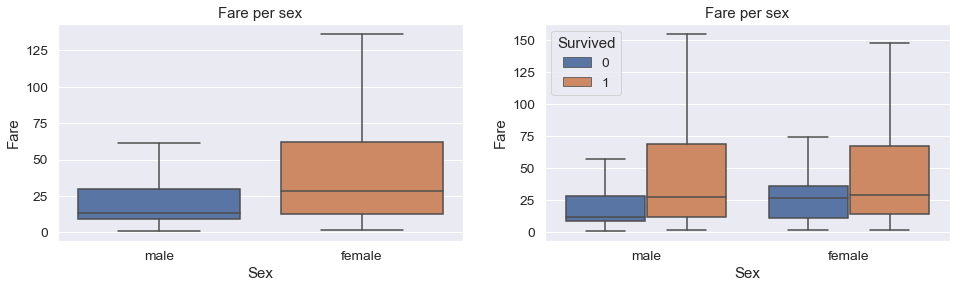

In [407]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(16,4))

sns.boxplot(data=passenger_data, x="Sex", y="Fare", showfliers = False, ax = axes[0])
axes[0].set_title('Fare per sex')
axes[0].set_ylabel('Fare')
axes[0].set_xlabel('Sex')

sns.boxplot(data=passenger_data, x="Sex", y="Fare", hue='Survived', showfliers = False)
axes[1].set_title('Fare per sex')
axes[1].set_ylabel('Fare')
axes[1].set_xlabel('Sex')

**Summary**: Women generally pay more for airfares, but survived men and women pay almost the same.

### 3.5. Fare vs SibSp/Parch

Text(0.5, 0, 'Number of Parents/Children')

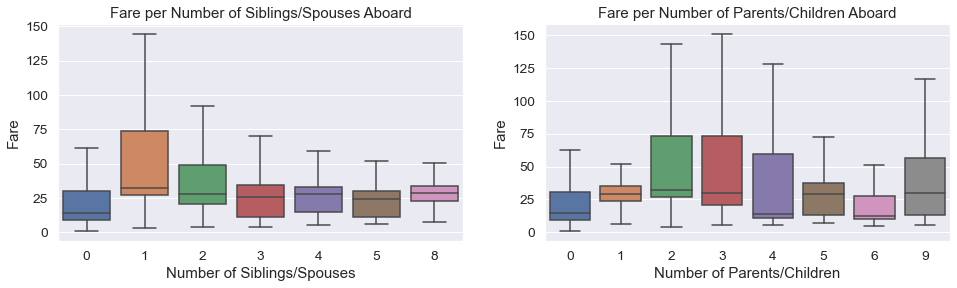

In [328]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(16,4))

sns.boxplot(data=passenger_data, x="SibSp", y="Fare", showfliers = False, ax = axes[0])
axes[0].set_title('Fare per Number of Siblings/Spouses Aboard')
axes[0].set_ylabel('Fare')
axes[0].set_xlabel('Number of Siblings/Spouses')

sns.boxplot(data=passenger_data, x="Parch", y="Fare", showfliers = False, ax = axes[1])
axes[1].set_title('Fare per Number of Parents/Children Aboard')
axes[1].set_ylabel('Fare')
axes[1].set_xlabel('Number of Parents/Children')

**Summary**:
- Passengers with **1 Sibling/Spouse** on board **pay the most** per flight.
- Passengers **without Siblings/Spouses** on board **pay the least** per flight.
- Passengers with **2-3 Parent/Children** on board **pay the most** per flight.
- Passengers with **6 Parent/Children** on board **pay the least** per flight.

### 3.6. Age vs SibSp/Parch

Text(0.5, 0, 'Number of Parents/Children')

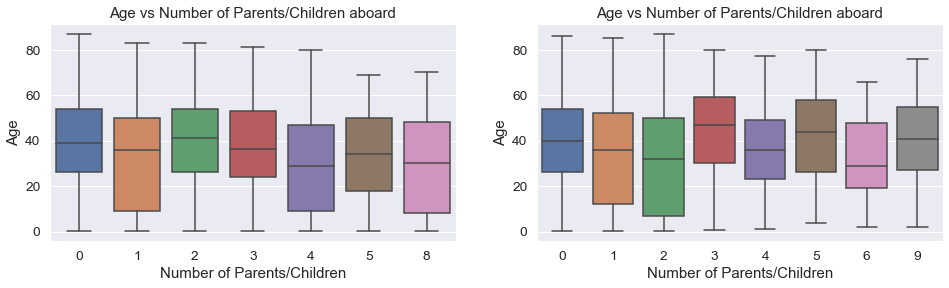

In [329]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(16,4))

sns.boxplot(data=passenger_data, x="SibSp", y="Age", ax = axes[0])
axes[0].set_title('Age vs Number of Parents/Children aboard')
axes[0].set_ylabel('Age')
axes[0].set_xlabel('Number of Parents/Children')

sns.boxplot(data=passenger_data, x="Parch", y="Age", ax = axes[1])
axes[1].set_title('Age vs Number of Parents/Children aboard')
axes[1].set_ylabel('Age')
axes[1].set_xlabel('Number of Parents/Children')

### 3.7. Name vs Survived

Text(0, 0.5, 'Name')

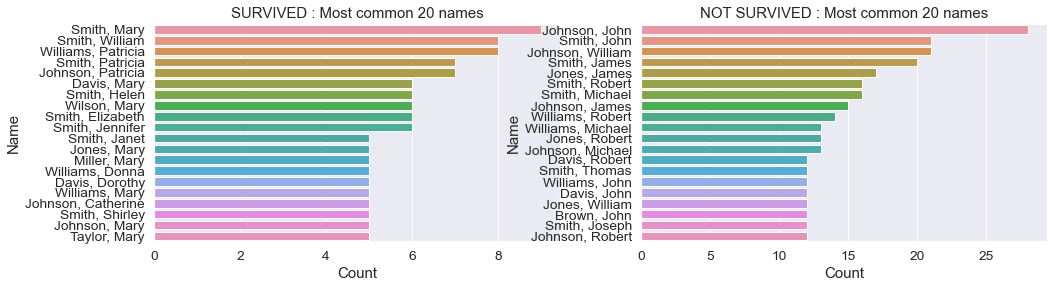

In [330]:
top_survived_names = passenger_data.loc[passenger_data.Survived == True].groupby('Name').Name.count().sort_values(ascending = False)
top_not_survived_names = passenger_data.loc[passenger_data.Survived == False].groupby('Name').Name.count().sort_values(ascending = False)

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(16,4))
sns.barplot(y=top_survived_names.iloc[0:20].index, x = top_survived_names.iloc[0:20].values , ax = axes[0])
axes[0].set_title(f"SURVIVED : Most common 20 names")
axes[0].set_xlabel(f"Count")
axes[0].set_ylabel(f"Name")

sns.barplot(y=top_not_survived_names.iloc[0:20].index, x = top_not_survived_names.iloc[0:20].values , ax = axes[1])
axes[1].set_title(f"NOT SURVIVED : Most common 20 names")
axes[1].set_xlabel(f"Count")
axes[1].set_ylabel(f"Name")

Text(0, 0.5, 'First Name')

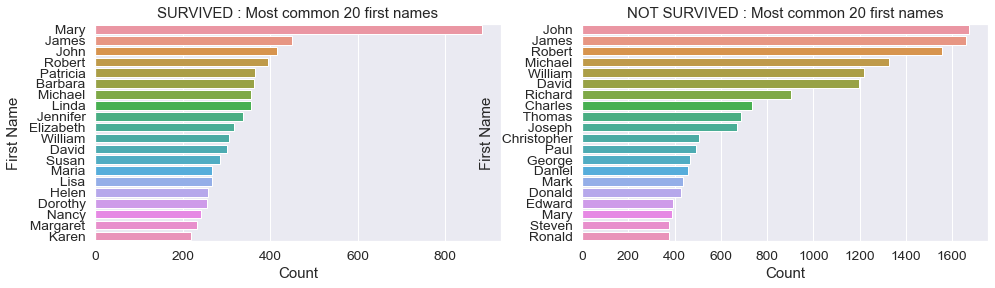

In [331]:
top_survived_first_names = passenger_data.loc[passenger_data.Survived == True].groupby('FirstName').Name.count().sort_values(ascending = False)
top_not_survived_first_names = passenger_data.loc[passenger_data.Survived == False].groupby('FirstName').Name.count().sort_values(ascending = False)

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(16,4))
sns.barplot(y=top_survived_first_names.iloc[0:20].index, x = top_survived_first_names.iloc[0:20].values , ax = axes[0])
axes[0].set_title(f"SURVIVED : Most common 20 first names")
axes[0].set_xlabel(f"Count")
axes[0].set_ylabel(f"First Name")

sns.barplot(y=top_not_survived_first_names.iloc[0:20].index, x = top_not_survived_first_names.iloc[0:20].values , ax = axes[1])
axes[1].set_title(f"NOT SURVIVED : Most common 20 first names")
axes[1].set_xlabel(f"Count")
axes[1].set_ylabel(f"First Name")

Text(0, 0.5, 'Last Name')

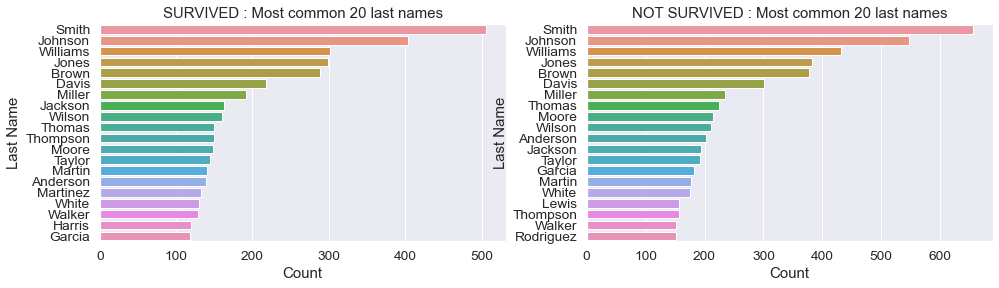

In [332]:
top_survived_last_name = passenger_data.loc[passenger_data.Survived == True].groupby('LastName').Name.count().sort_values(ascending = False)
top_not_survived_last_names = passenger_data.loc[passenger_data.Survived == False].groupby('LastName').Name.count().sort_values(ascending = False)

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(16,4))
sns.barplot(y=top_survived_last_names.iloc[0:20].index, x = top_survived_last_names.iloc[0:20].values , ax = axes[0])
axes[0].set_title(f"SURVIVED : Most common 20 last names")
axes[0].set_xlabel(f"Count")
axes[0].set_ylabel(f"Last Name")

sns.barplot(y=top_not_survived_last_names.iloc[0:20].index, x = top_not_survived_last_names.iloc[0:20].values , ax = axes[1])
axes[1].set_title(f"NOT SURVIVED : Most common 20 last names")
axes[1].set_xlabel(f"Count")
axes[1].set_ylabel(f"Last Name")

### 3.8. Embarked vs Fare

Text(0.5, 0, 'Embarked')

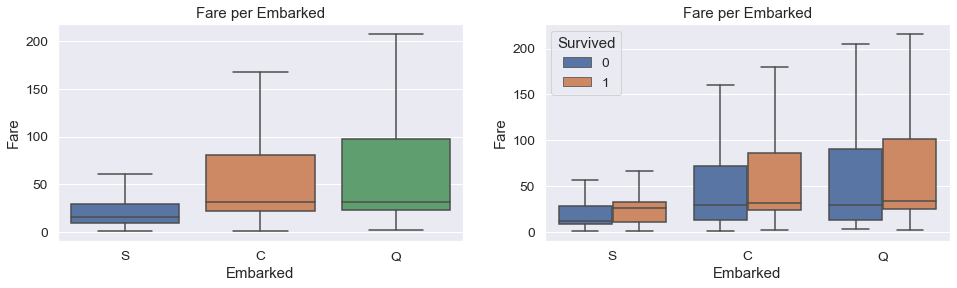

In [412]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(16,4))

sns.boxplot(data=passenger_data, x="Embarked", y="Fare", showfliers = False, ax = axes[0])
axes[0].set_title('Fare per Embarked')
axes[0].set_ylabel('Fare')
axes[0].set_xlabel('Embarked')

sns.boxplot(data=passenger_data, x="Embarked", y="Fare", hue='Survived', showfliers = False)
axes[1].set_title('Fare per Embarked')
axes[1].set_ylabel('Fare')
axes[1].set_xlabel('Embarked')

**Summary**: the cheapest Embarked point is S (Southampton).

### 3.9. Embarked vs Age

Text(0.5, 0, 'Embarked')

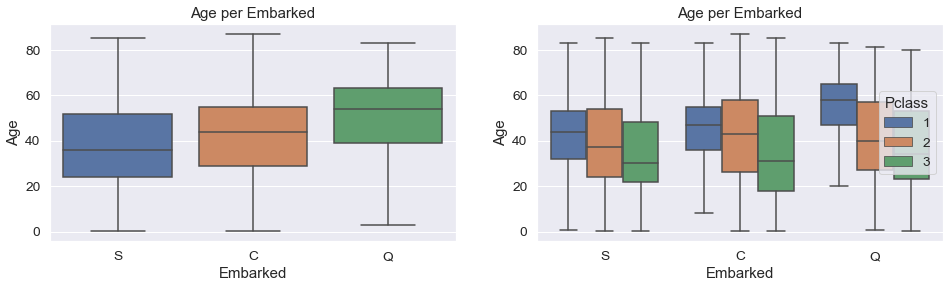

In [413]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(16,4))

sns.boxplot(data=passenger_data, x="Embarked", y="Age", showfliers = False, ax = axes[0])
axes[0].set_title('Age per Embarked')
axes[0].set_ylabel('Age')
axes[0].set_xlabel('Embarked')

sns.boxplot(data=passenger_data, x="Embarked", y="Age", hue='Pclass', showfliers = False)
axes[1].set_title('Age per Embarked')
axes[1].set_ylabel('Age')
axes[1].set_xlabel('Embarked')

**Summary**: more older people tend to use Embarked Point Q (Queenstown).

# Summary

- To survive, it is better to fly first class.
- The higher passenger class (Pclass), the higher fare.
- the older the passenger, the higher the flight class.
- Fare and survival rate do not greatly depend on whether the passenger is a child or an adult.
- Women generally pay more for airfares, but survived men and women pay almost the same.
- Passengers with 1 Sibling/Spouse on board pay the most per flight.
- Passengers without Siblings/Spouses on board pay the least per flight.
- Passengers with 2-3 Parent/Children on board pay the most per flight.
- Passengers with 6 Parent/Children on board pay the least per flight.
- The cheapest Embarked point is S (Southampton).
- More older people tend to use Embarked Point Q (Queenstown).